Data Science Fundamentals: R |
[Table of Contents](../index.ipynb)
- - - 
<!--NAVIGATION-->
Module 16. [Exploratory Data Analysis Using Models](./00.ipynb) | [Model Basics](./01.ipynb) | [Model Building](./02.ipynb) | [Exercises](./03.ipynb)

# Model Building with R

![images](images/slides15.png)

## Diamond Dataset

In [19]:
install.packages("hexbin")


The downloaded binary packages are in
	/var/folders/39/rw094bh97s1fm7lfmg_nwcxm0000gn/T//RtmpPmNFju/downloaded_packages


In [15]:
library(tidyverse)
library(modelr)
options(na.action = na.warn)

In [20]:
library(nycflights13)
library(hexbin)
library(lubridate)

It looks like lower quality diamonds have higher prices because there is an important confounding variable: the weight (carat) of the diamond. The weight of the diamond is the single most important factor for determining the price of the diamond, and lower quality diamonds tend to be larger.

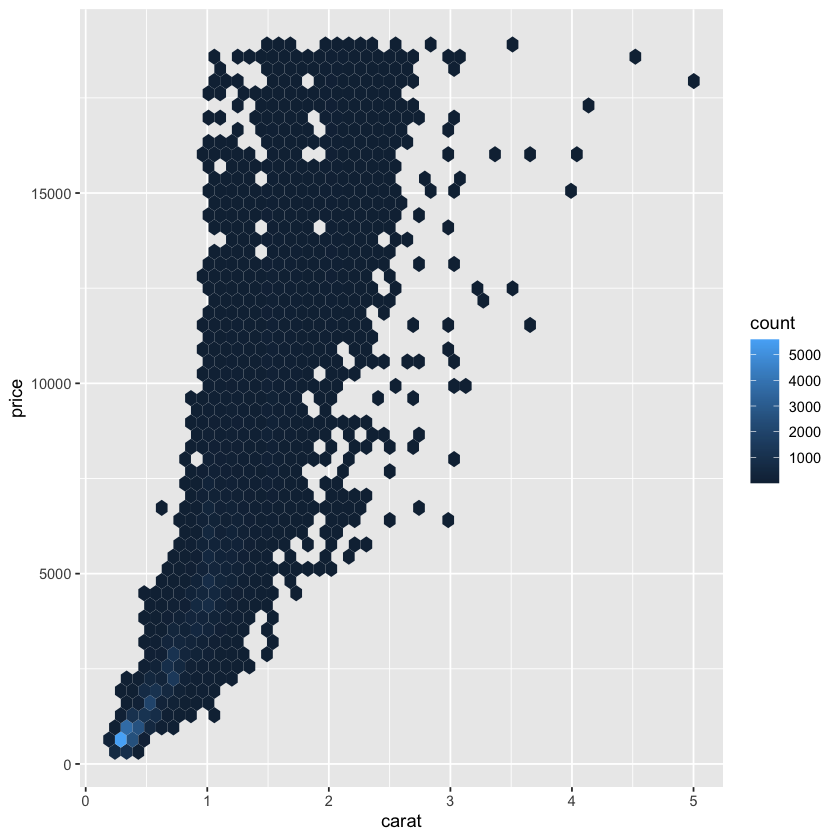

In [21]:
ggplot(diamonds, aes(carat, price)) + 
  geom_hex(bins = 50)

### Why are lower quality diamonds more expensive? 

a surprising relationship between the quality of diamonds and their price: low quality diamonds (poor cuts, bad colours, and inferior clarity) have higher prices.

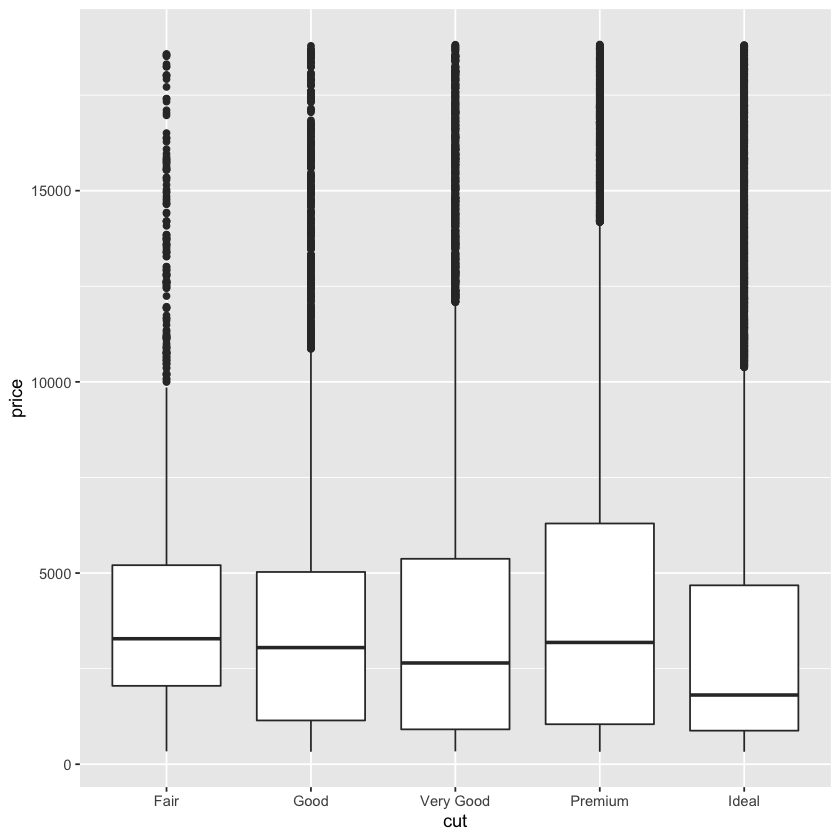

In [22]:
ggplot(diamonds, aes(cut, price)) + geom_boxplot()

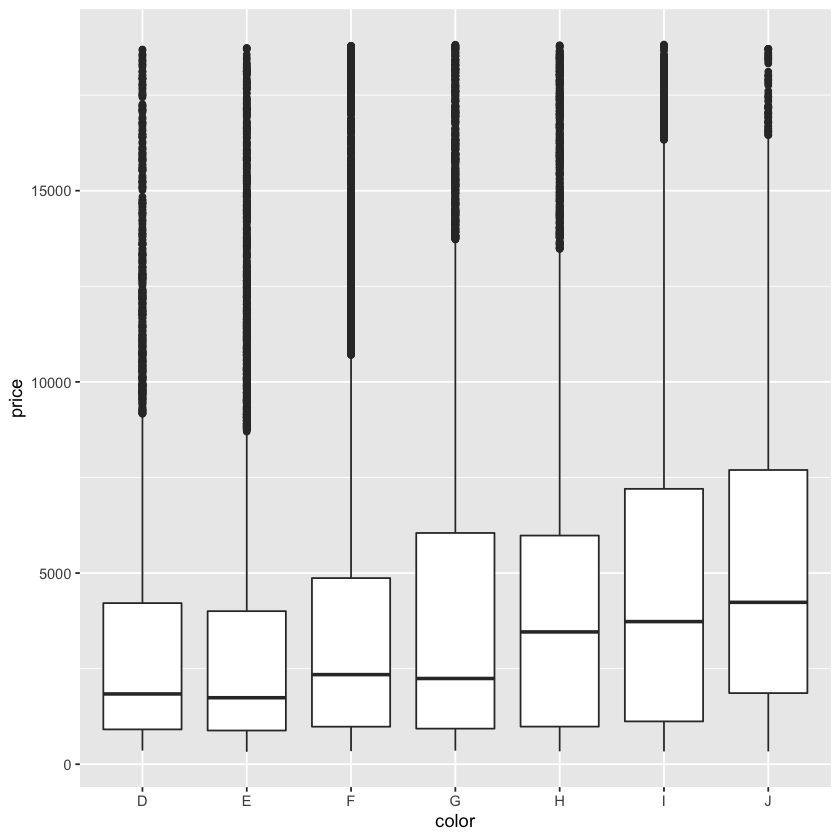

In [23]:
ggplot(diamonds, aes(color, price)) + geom_boxplot()

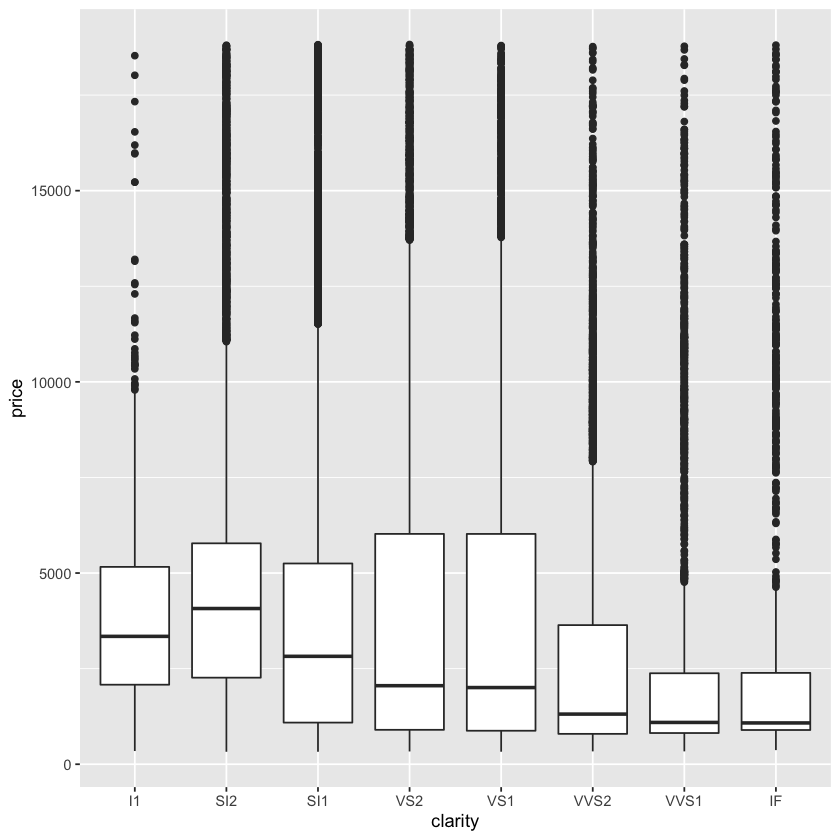

In [24]:
ggplot(diamonds, aes(clarity, price)) + geom_boxplot()

Remember that diamond color goes from J (worst) to D (best).

## Patterns and Models

It is hard to understand the relationship between cut and price.  Use a model to remove the very strong relationship between price and carat.

In [26]:
# fit a model
mod <- lm(log(price) ~ log(carat), data = diamonds)
# plot the predictions
diamonds.mod <- diamonds %>% add_predictions(mod) %>%
  mutate(pred=exp(pred), resid=price-pred)

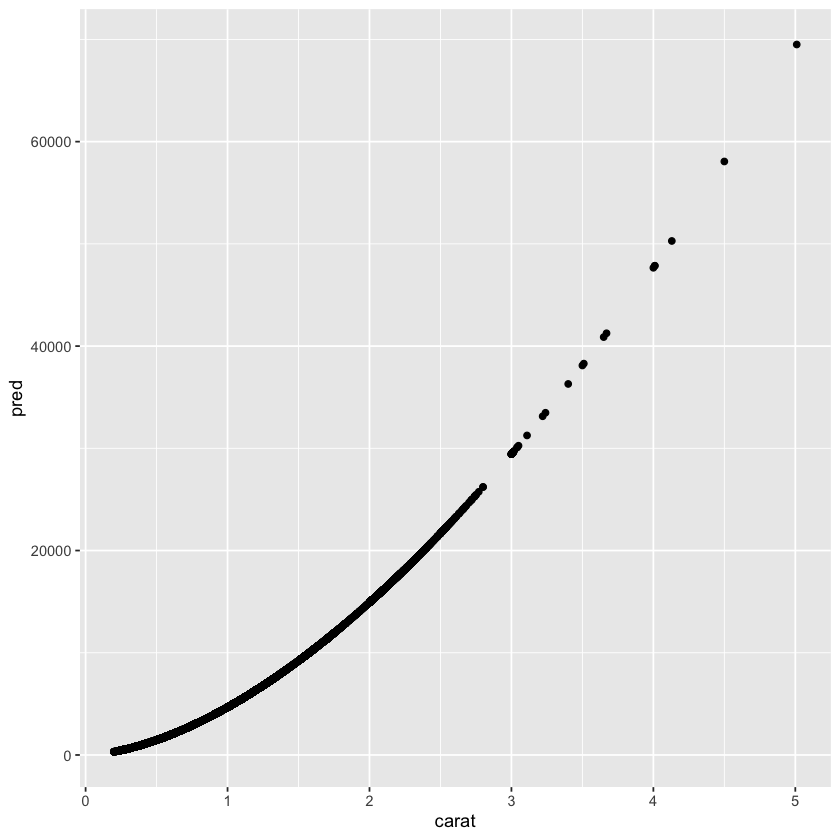

In [27]:
ggplot(diamonds.mod) + geom_point(aes(x=carat, y=pred))

## Residuals

Residuals are the differences between the true and predicted price.

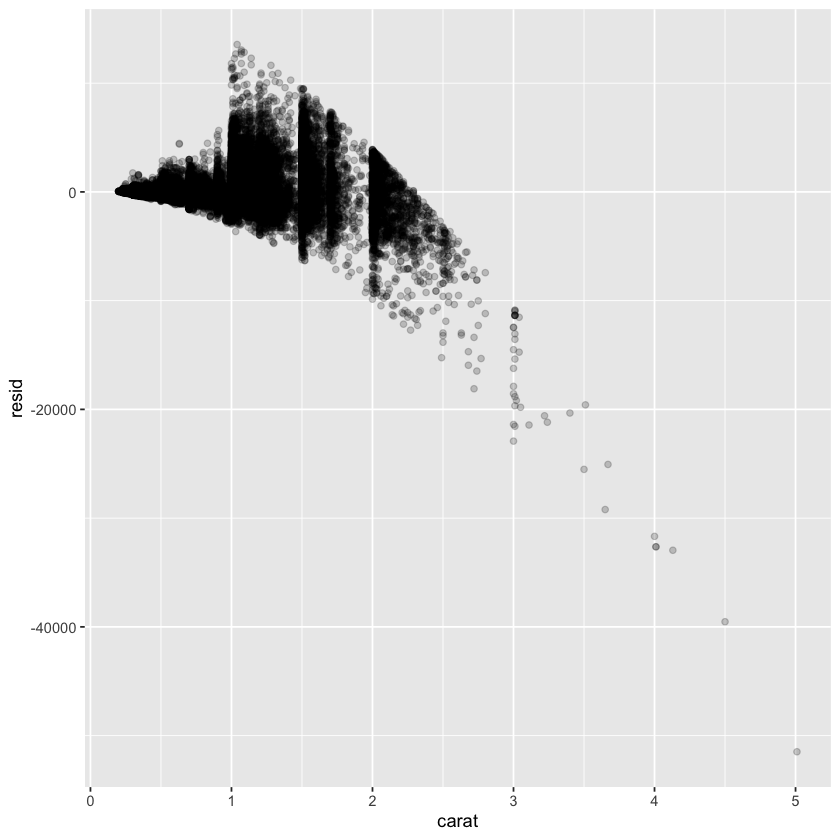

In [29]:
ggplot(diamonds.mod) + geom_point(aes(x=carat, y=resid), alpha=0.2)

This model seems to overestimate the price of large diamonds.

## Using Residuals

Once you've removed the strong relationship between carat and price, you can see what you expect in the relationship between cut and price:  relative to their size, better quality diamonds are more expensive.

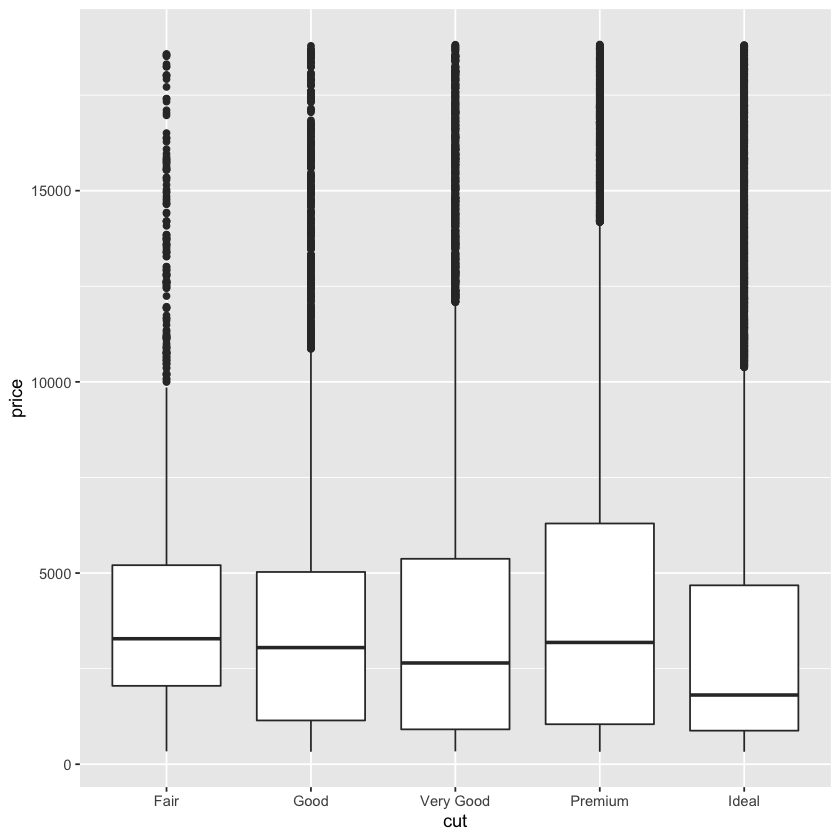

In [30]:
ggplot(diamonds) + 
  geom_boxplot(aes(x=cut, y=price))

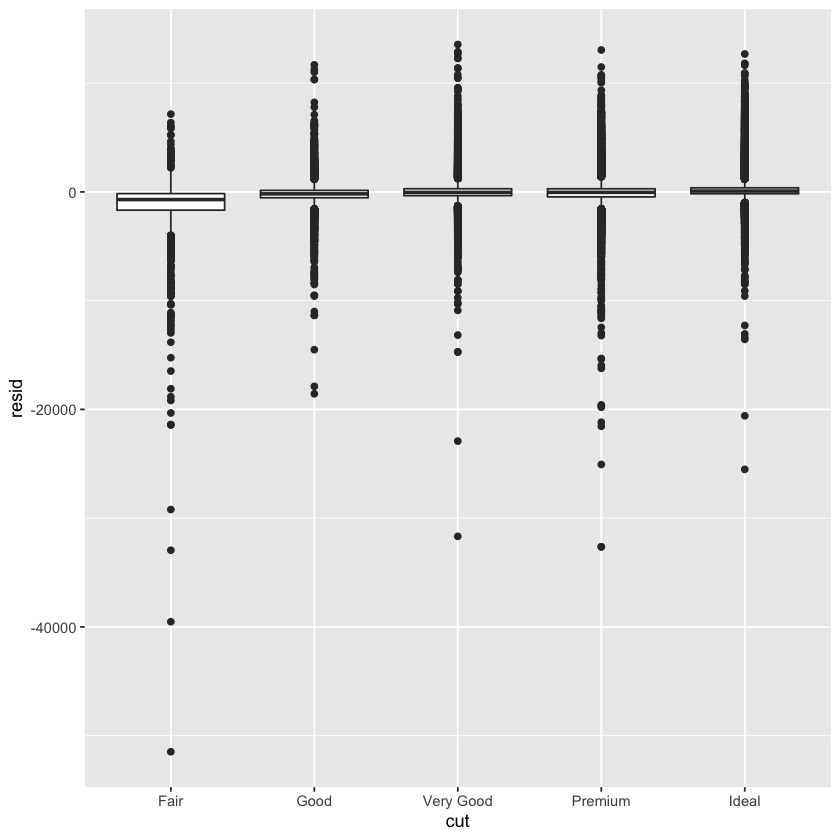

In [31]:
ggplot(diamonds.mod) +
  geom_boxplot(aes(x=cut, y=resid))

## Price and Carat

Focus on diamonds smaller than 2.5 carats (99.7% of the data).

### A More Complicated Model

In [40]:
mod_diamond2 <- lm(lprice ~ lcarat + color + cut + clarity, data = diamonds2)

This model now includes four predictors, so it's getting harder to visualize.  Since there are no interaction terms: plot them individually in four plots.   For example, we can plot the effect of "cut" with others fixed.

In [52]:
grid <- diamonds2 %>% 
  data_grid(cut, .model = mod_diamond2) %>% 
  add_predictions(mod_diamond2)
grid

cut,lcarat,color,clarity,pred
<ord>,<dbl>,<chr>,<chr>,<dbl>
Fair,-0.5145732,G,VS2,11.20557
Good,-0.5145732,G,VS2,11.32050
Very Good,-0.5145732,G,VS2,11.37396
Premium,-0.5145732,G,VS2,11.40627
Ideal,-0.5145732,G,VS2,11.43759


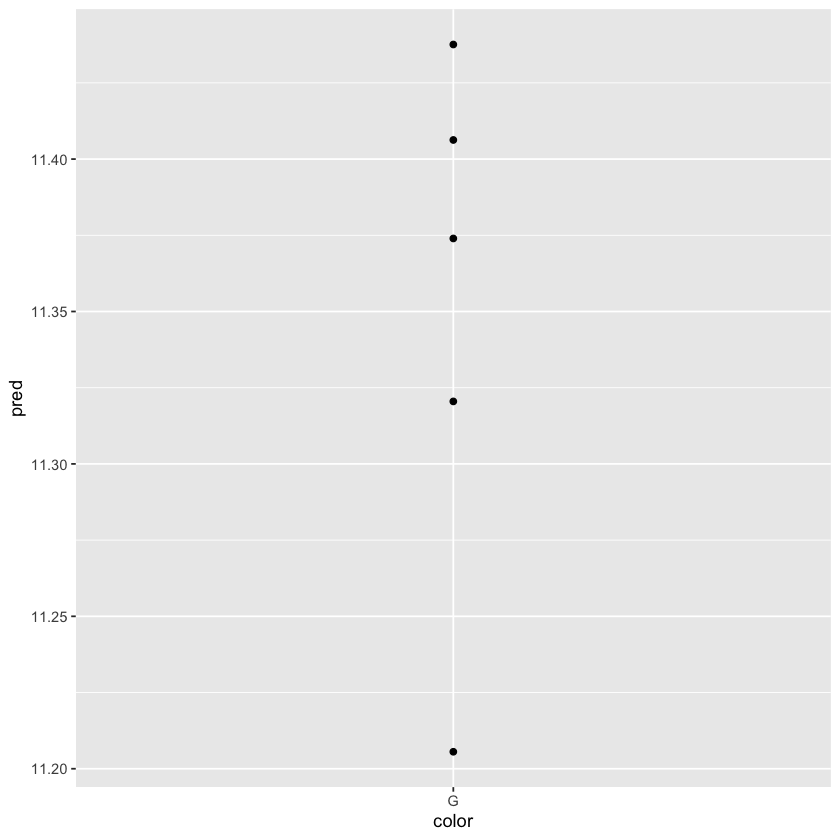

In [53]:
ggplot(grid, aes(color, pred)) + geom_point()

For the effect of color, we used: 

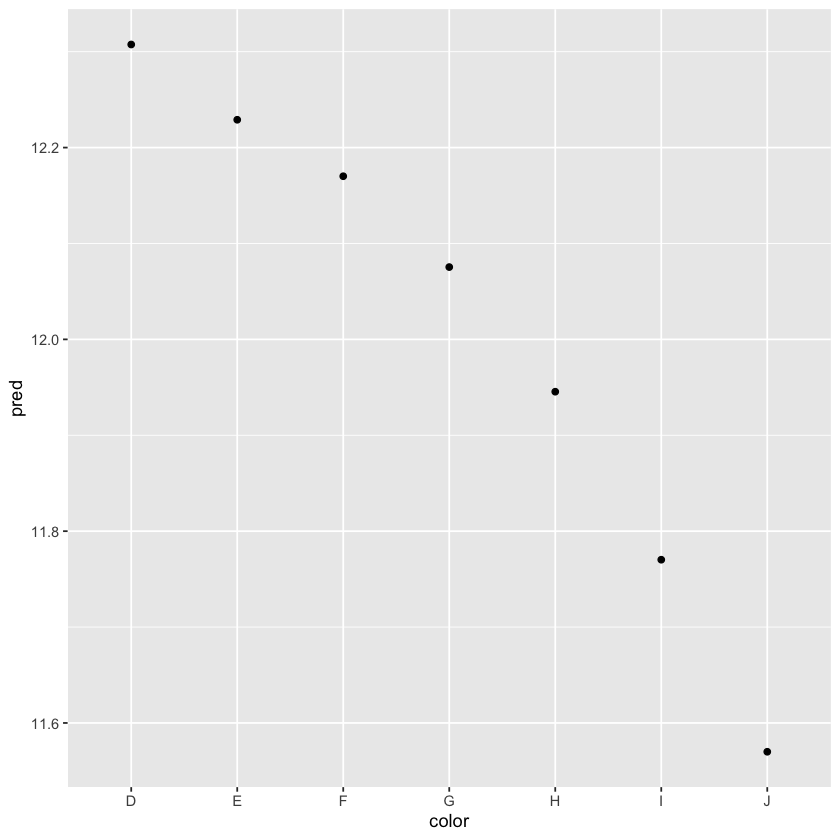

In [51]:
grid <- diamonds2 %>% 
  data_grid(color, lcarat = 0, cut = "Good", clarity = "SI1") %>% 
  add_predictions(mod_diamond2)
ggplot(grid, aes(color, pred)) + geom_point()

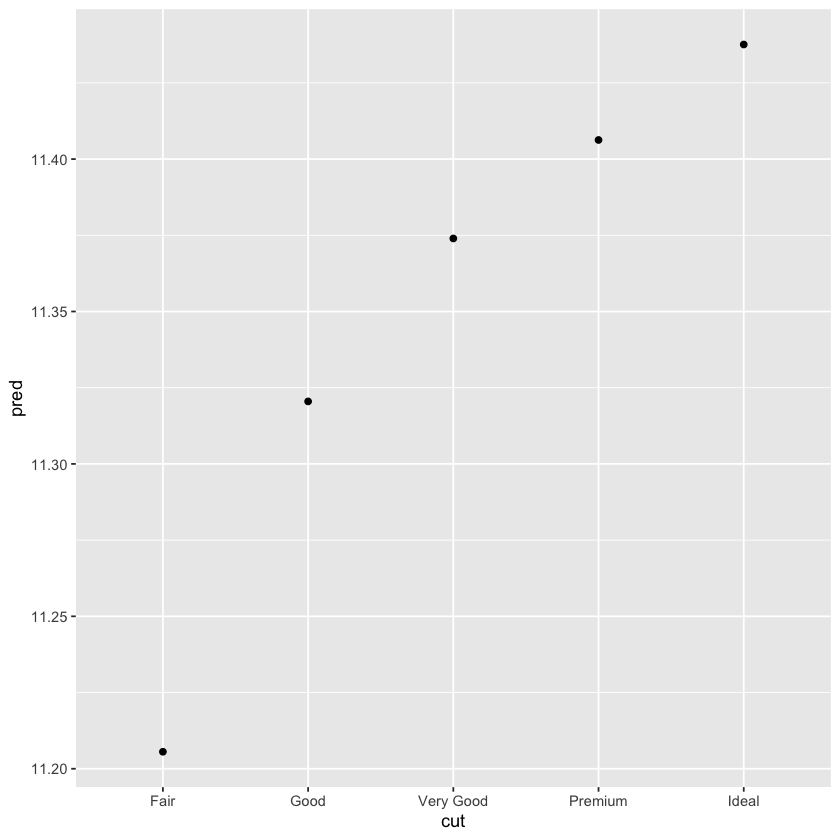

In [55]:
ggplot(grid, aes(cut, pred)) + 
  geom_point()

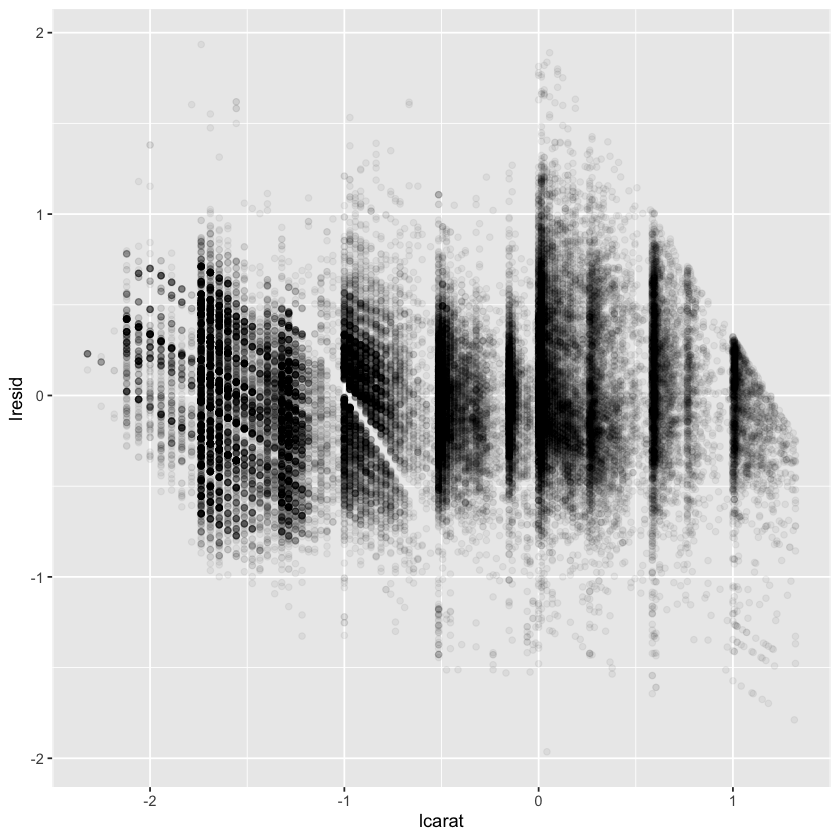

In [57]:
diamonds.mod <- diamonds2 %>% add_residuals(mod_diamond, "lresid")
ggplot(diamonds.mod) + geom_point(aes(x=lcarat, y=lresid), alpha=0.05)

Now we see no obvious trend in the residuals.  However, some diamonds have quite large residuals.

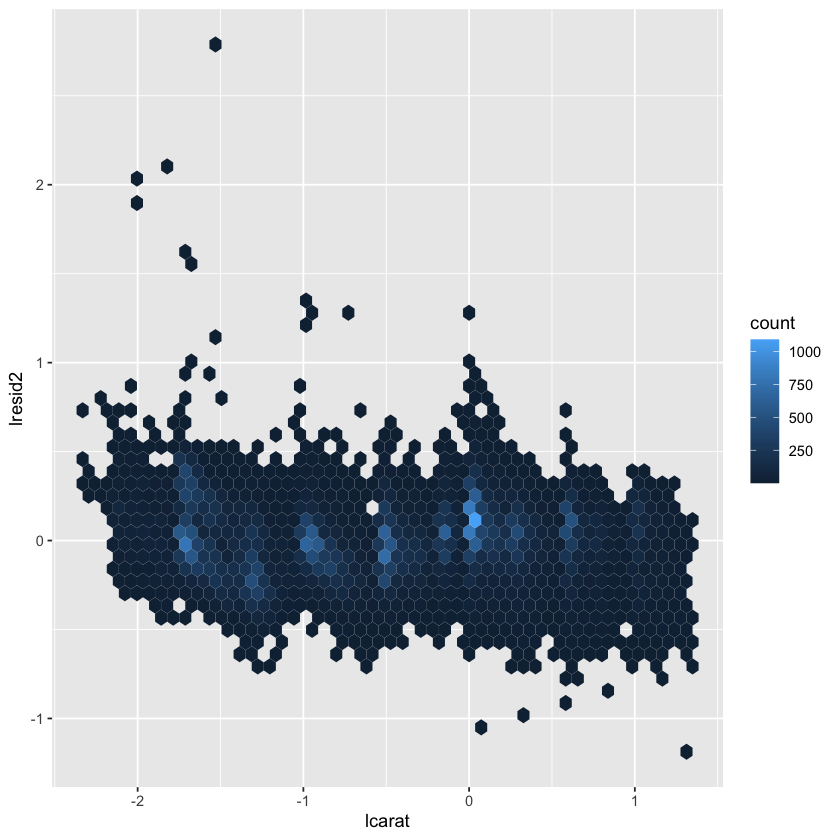

In [56]:
diamonds2 <- diamonds2 %>% 
  add_residuals(mod_diamond2, "lresid2")

ggplot(diamonds2, aes(lcarat, lresid2)) + 
  geom_hex(bins = 50)

In [43]:
# log-transform carat and price, then fit linear model
diamonds2 <- diamonds %>% filter(carat <= 2.5) %>%
  mutate(lprice = log2(price), lcarat = log2(carat))
mod_diamond <- lm(lprice ~ lcarat, data = diamonds2)
diamonds.mod <- diamonds2 %>%
  add_predictions(mod_diamond, "lprice.pred") %>%
  add_residuals(mod_diamond, "lprice.resid")

In [44]:
p1 <- ggplot(diamonds.mod, aes(cut, lprice.resid)) + geom_boxplot()
p2 <- ggplot(diamonds.mod, aes(color, lprice.resid)) + geom_boxplot()

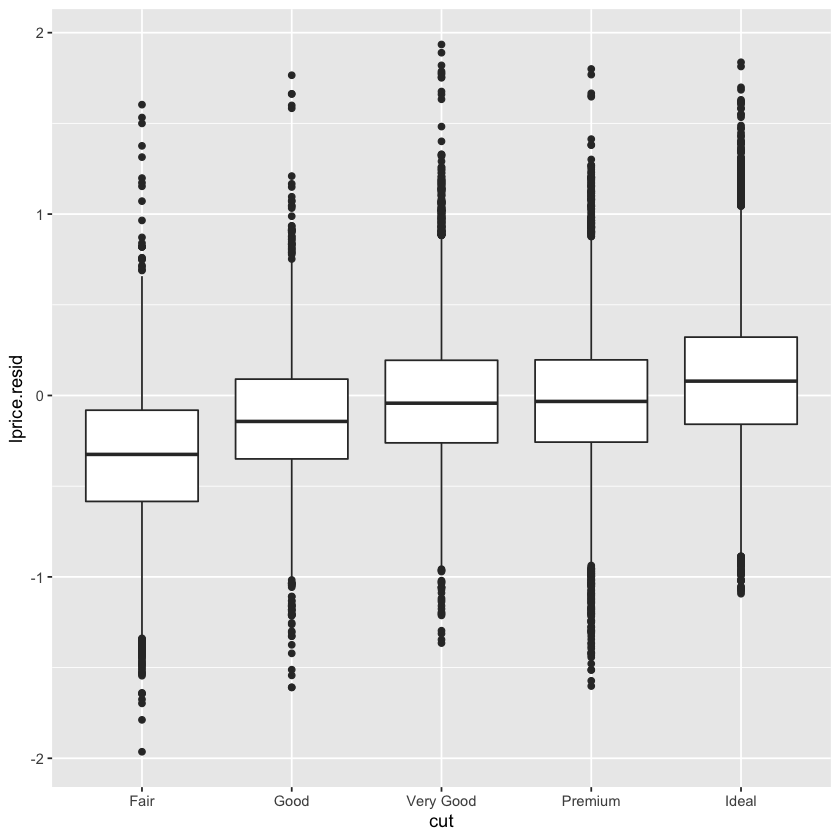

In [45]:
p1

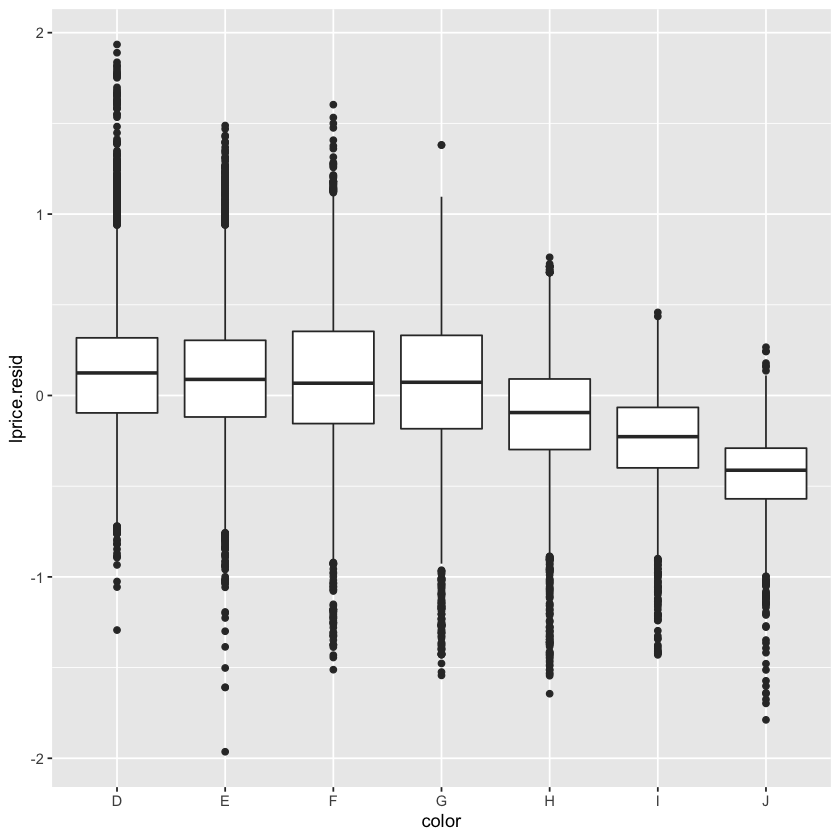

In [46]:
p2

Now we see the relationship we expect: as the quality of the diamond increases, so too does its relative price. The same thing can be observed with "clarity". 

- - -
## Hands-On Exercises

In [59]:
library(tidyverse)

In [60]:
library(nycflights13)

In [61]:
library(lubridate)

In [62]:
flights

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


### What affects the number of daily flights?

Create a new date variable.  

In [63]:
daily <- flights %>%
  mutate(date = make_date(year, month, day))
daily %>% select(date, everything())

date,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<date>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013-01-01,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013-01-01,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013-01-01,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013-01-01,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013-01-01,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013-01-01,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013-01-01,2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013-01-01,2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013-01-01,2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


## Hands-On Exercise 1.

![images](images/handson1.png)

In [65]:
# hands on exercise 1

daily <- flights %>% 
  mutate(date = make_date(year, month, day)) %>% 
  group_by(date) %>% 
  summarise(n = n())
daily

`summarise()` ungrouping output (override with `.groups` argument)



date,n
<date>,<int>
2013-01-01,842
2013-01-02,943
2013-01-03,914
2013-01-04,915
2013-01-05,720
2013-01-06,832
2013-01-07,933
2013-01-08,899
2013-01-09,902


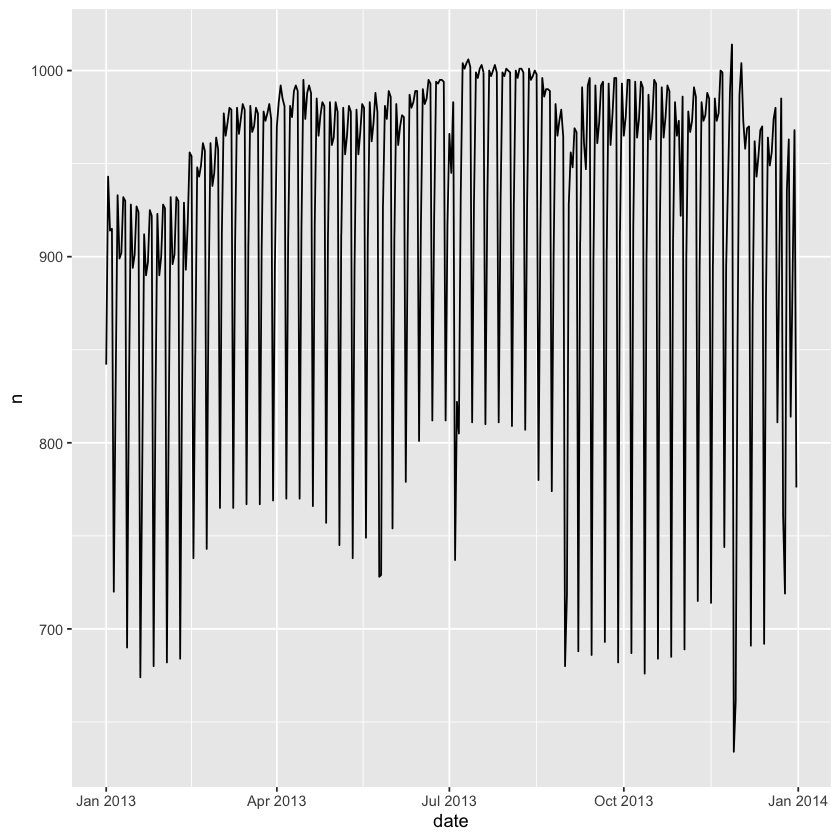

In [66]:
ggplot(daily, aes(date, n)) + 
  geom_line()

## Hands-On Exercise 2.

![images](images/handson2.png)

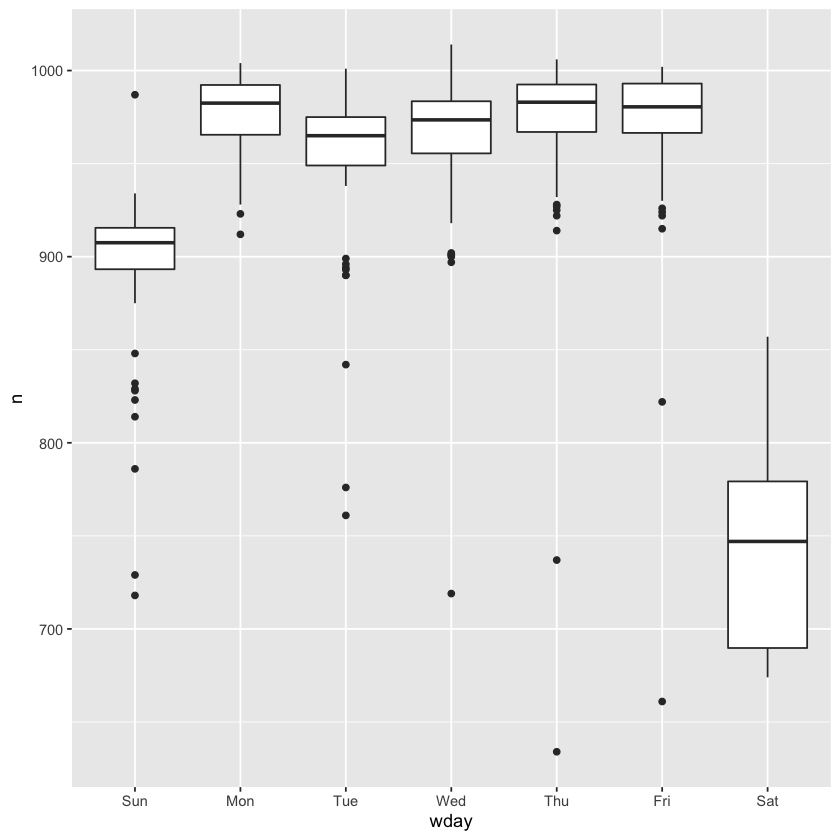

In [67]:
# hands on exercise 2
daily <- daily %>% 
  mutate(wday = wday(date, label = TRUE))
ggplot(daily, aes(wday, n)) + 
  geom_boxplot()

## Hands-On Exercise 3.

![images](images/handson3.png)

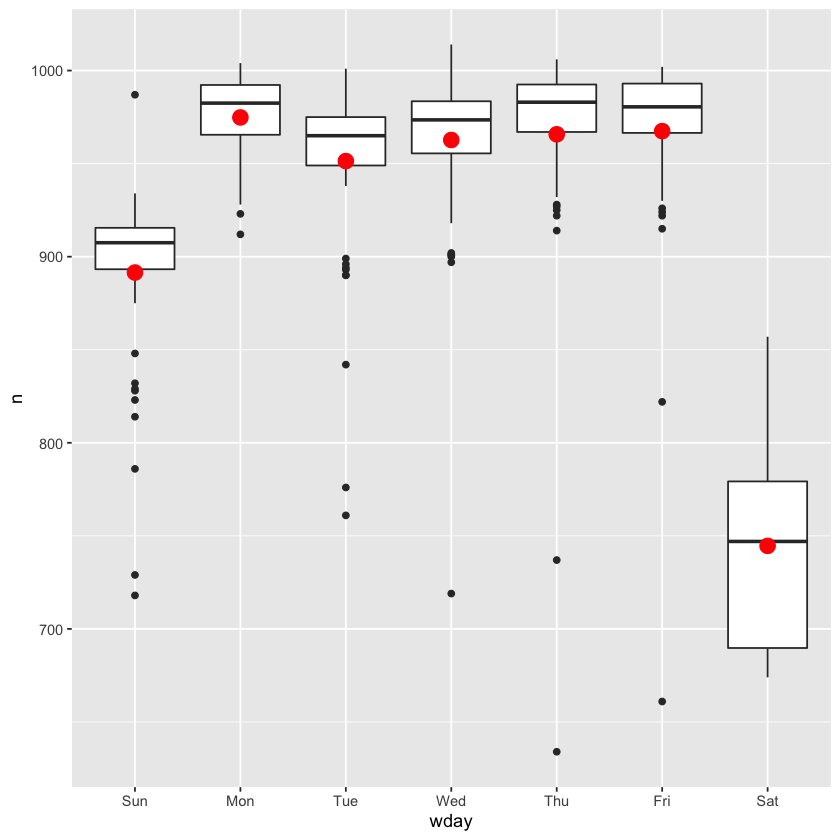

In [68]:
# hands on exercises 3
mod <- lm(n ~ wday, data = daily)

grid <- daily %>% 
  data_grid(wday) %>% 
  add_predictions(mod, "n")

ggplot(daily, aes(wday, n)) + 
  geom_boxplot() +
  geom_point(data = grid, colour = "red", size = 4)

## Hands-On Exercise 4.

![images](images/handson4.png)

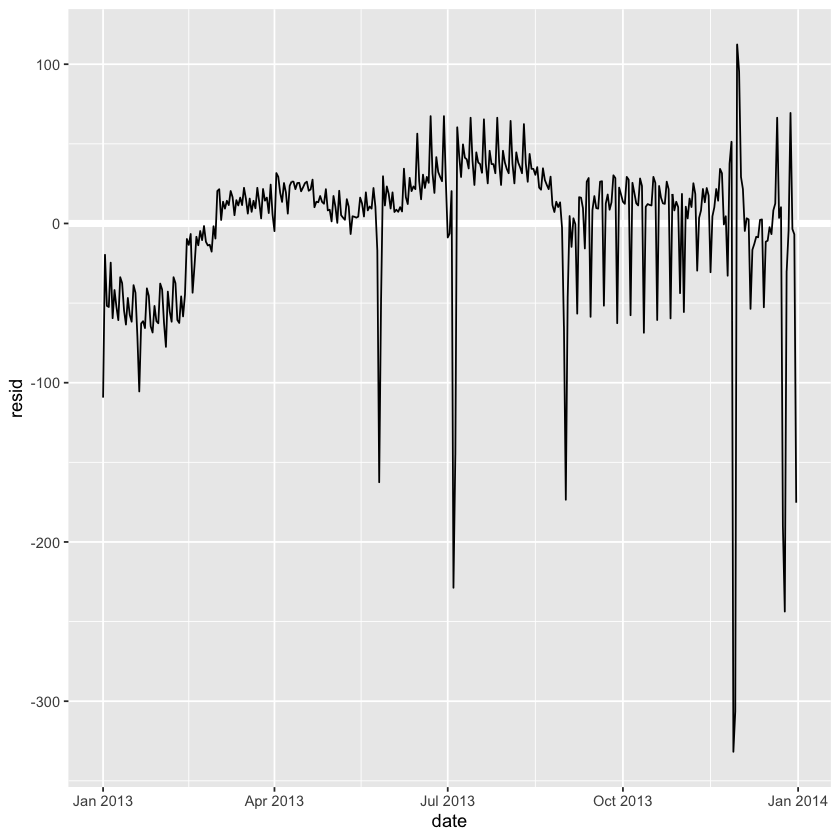

In [69]:
# hands on exercises 4
daily <- daily %>% 
  add_residuals(mod)
daily %>% 
  ggplot(aes(date, resid)) + 
  geom_ref_line(h = 0) + 
  geom_line()

## Hands-On Exercises 5.

![images](images/handson5.png)

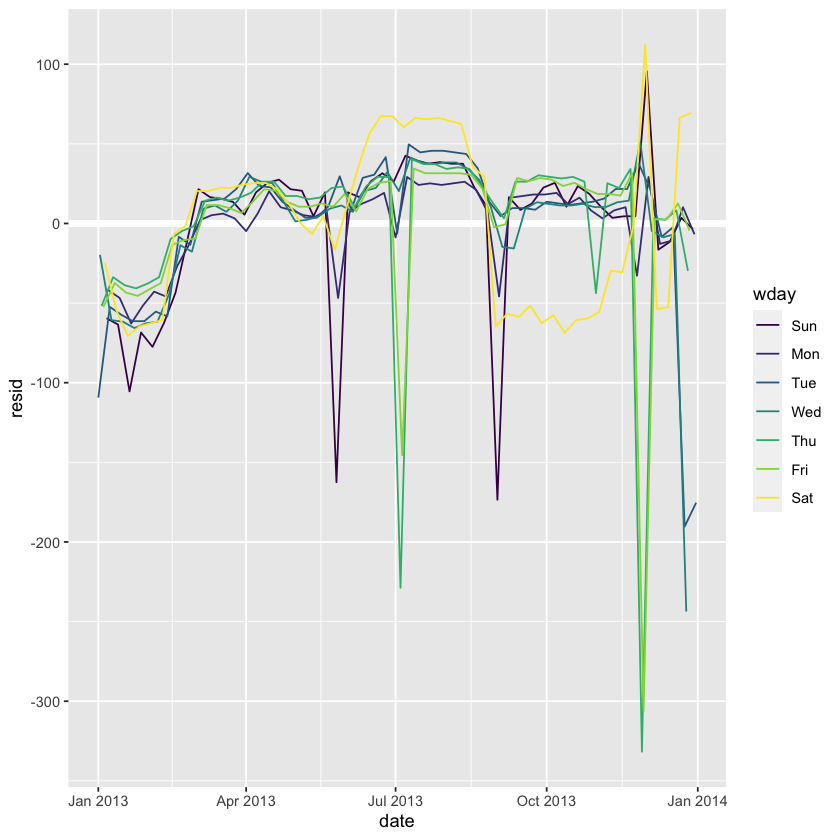

In [70]:
ggplot(daily, aes(date, resid, color = wday)) +
  geom_ref_line(h = 0) + geom_line()

In [ ]:
# hands on exercises 5

## Hands-On Exercises 6.

![images](images/handson6.png)

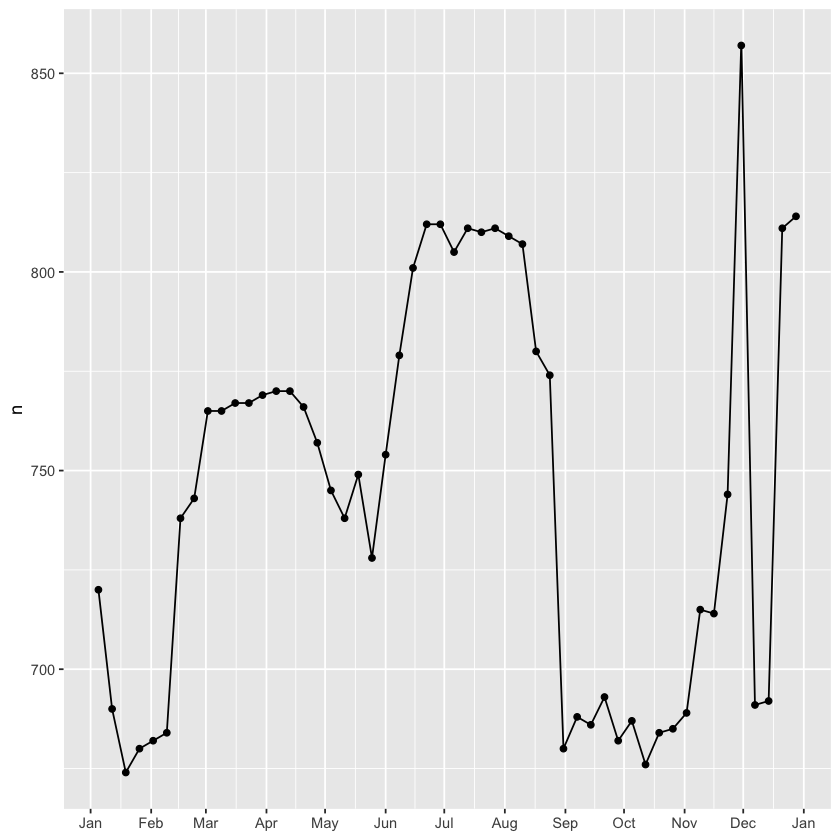

In [72]:
# hands on exercises 6
daily %>% 
  filter(wday == "Sat") %>% 
  ggplot(aes(date, n)) + 
    geom_point() + 
    geom_line() +
    scale_x_date(NULL, date_breaks = "1 month", date_labels = "%b")

## Hands-On Exercises 7

![images](images/handson7.png)

In [73]:
daily <- daily %>%
  mutate(term = cut(date,
                   breaks = ymd("2013-01-01", "2013-06-05", "2013-08-25", "2014-01-01"),
                   labels = c("spring", "summer", "fall")))

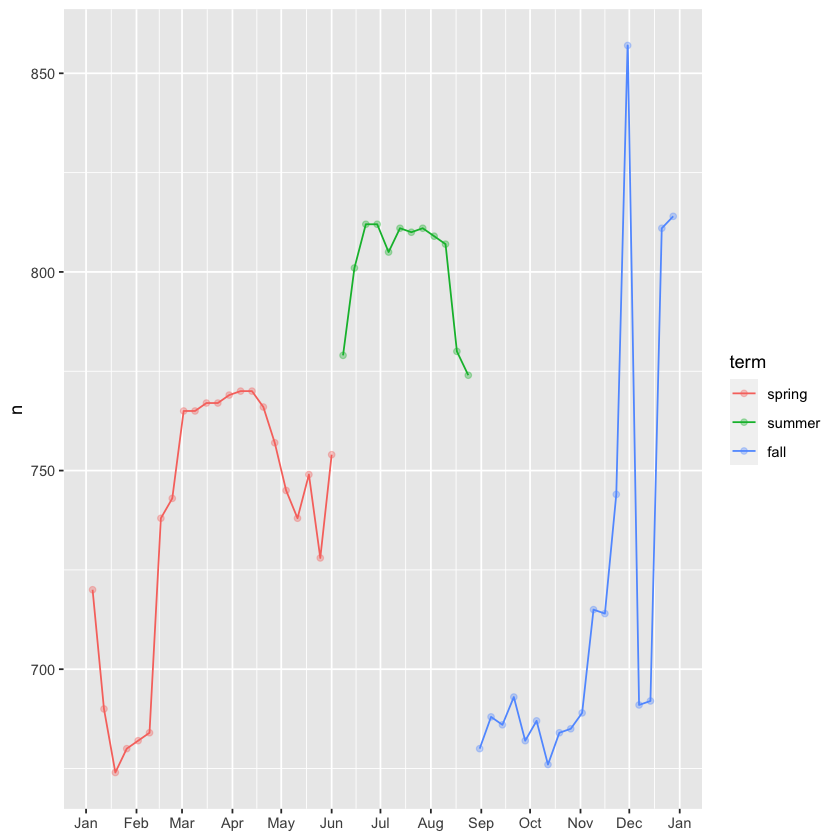

In [74]:
# exercise 7

daily %>% 
  filter(wday == "Sat") %>% 
  ggplot(aes(date, n, colour = term)) +
  geom_point(alpha = 1/3) + 
  geom_line() +
  scale_x_date(NULL, date_breaks = "1 month", date_labels = "%b")

## Hands-On Exercises 8

![images](images/handson8.png)

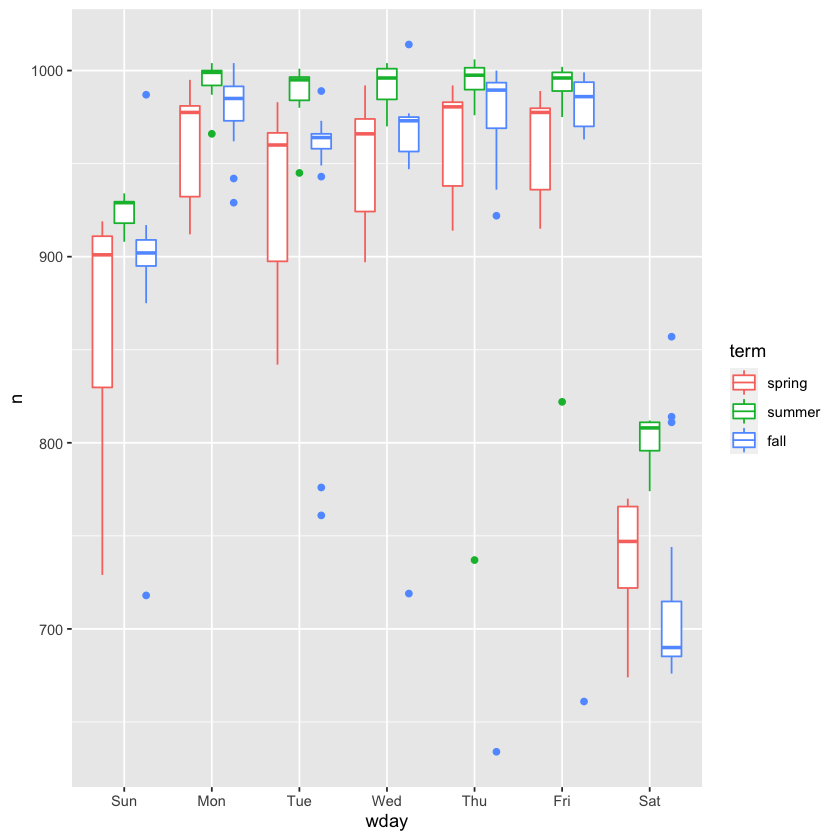

In [75]:
# hands on exercises 8

daily %>% 
  ggplot(aes(wday, n, colour = term)) +
    geom_boxplot()

## Hands-On Exercises 9

![images](images/handson9.png)

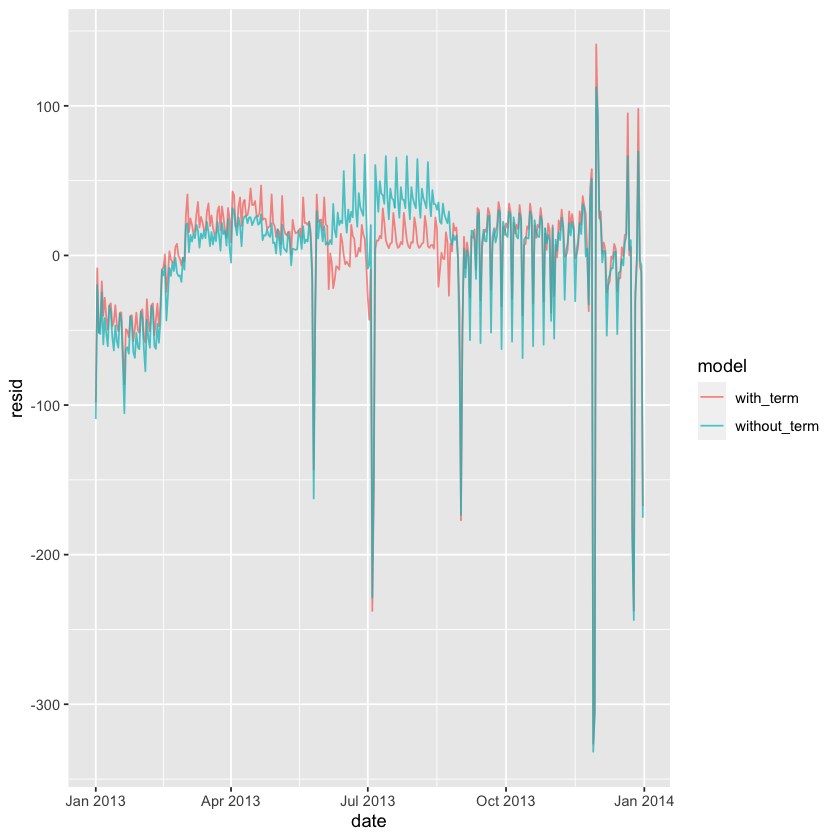

In [76]:
# hands on exercises 9

mod1 <- lm(n ~ wday, data = daily)
mod2 <- lm(n ~ wday * term, data = daily)

daily %>% 
  gather_residuals(without_term = mod1, with_term = mod2) %>% 
  ggplot(aes(date, resid, colour = model)) +
    geom_line(alpha = 0.75)

## Hands-On Exercises 10

![images](images/handson10.png)

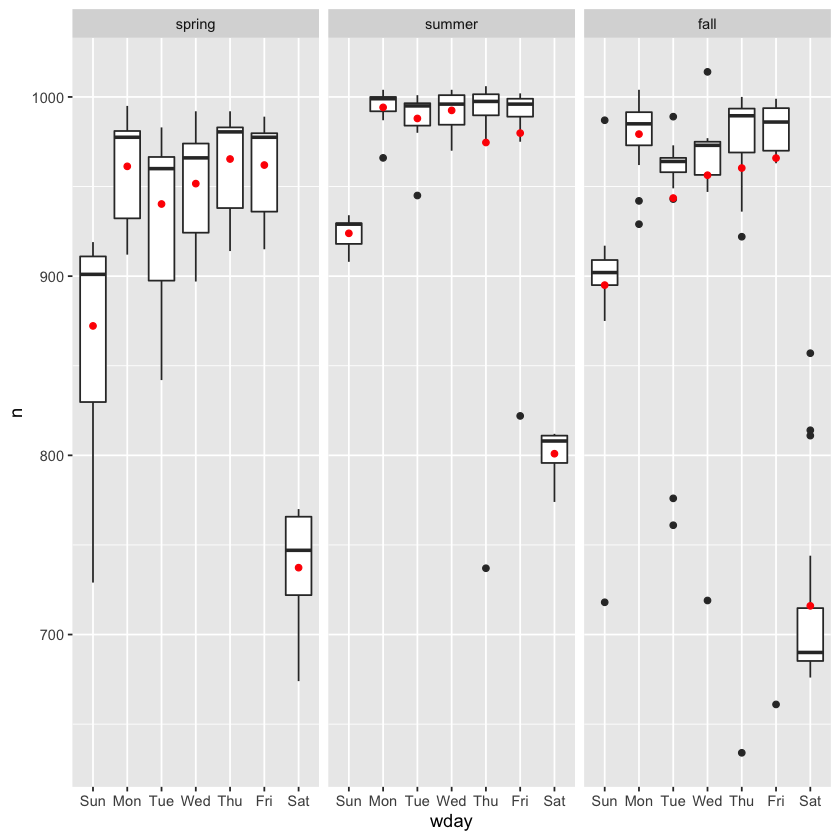

In [77]:
# hands on exercises 10

grid <- daily %>% 
  data_grid(wday, term) %>% 
  add_predictions(mod2, "n")

ggplot(daily, aes(wday, n)) +
  geom_boxplot() + 
  geom_point(data = grid, colour = "red") + 
  facet_wrap(~ term)

## Fitting A Robust Linear Regression

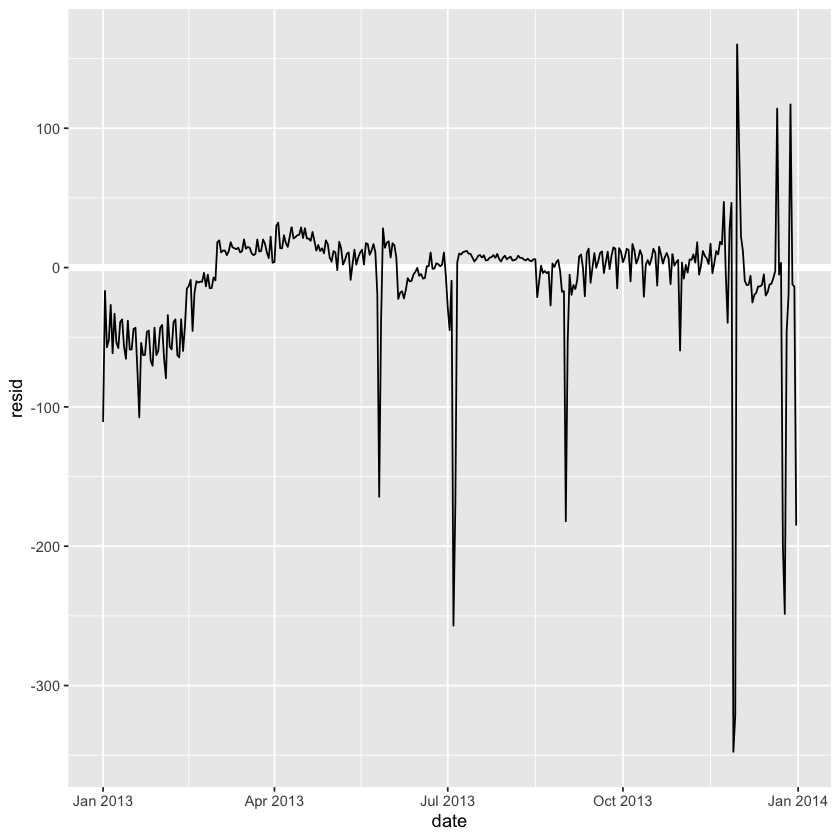

In [78]:
mod3 <- MASS::rlm(n ~ wday * term, data = daily)

daily %>% 
  add_residuals(mod3, "resid") %>% 
  ggplot(aes(date, resid)) + 
  geom_hline(yintercept = 0, size = 2, colour = "white") + 
  geom_line()

Now it is easier to see the long-term trend, and the outliers. 

## Identifying The Outliers

Can we explain the remaining large residuals?

In [79]:
daily %>% add_residuals(mod3, "resid") %>%
  filter(abs(resid) > 100)

date,n,wday,resid,term
<date>,<int>,<ord>,<dbl>,<fct>
2013-01-01,842,Tue,-110.8388,spring
2013-01-20,786,Sun,-107.4956,spring
2013-05-26,729,Sun,-164.4956,spring
2013-07-04,737,Thu,-257.0321,summer
2013-07-05,822,Fri,-170.0321,summer
2013-09-01,718,Sun,-182.0845,fall
2013-11-28,634,Thu,-347.5372,fall
2013-11-29,661,Fri,-321.4326,fall
2013-11-30,857,Sat,160.1007,fall


Many correspond to US public holidays.

## Long Term Trend

We can still see some smooth long term trend. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



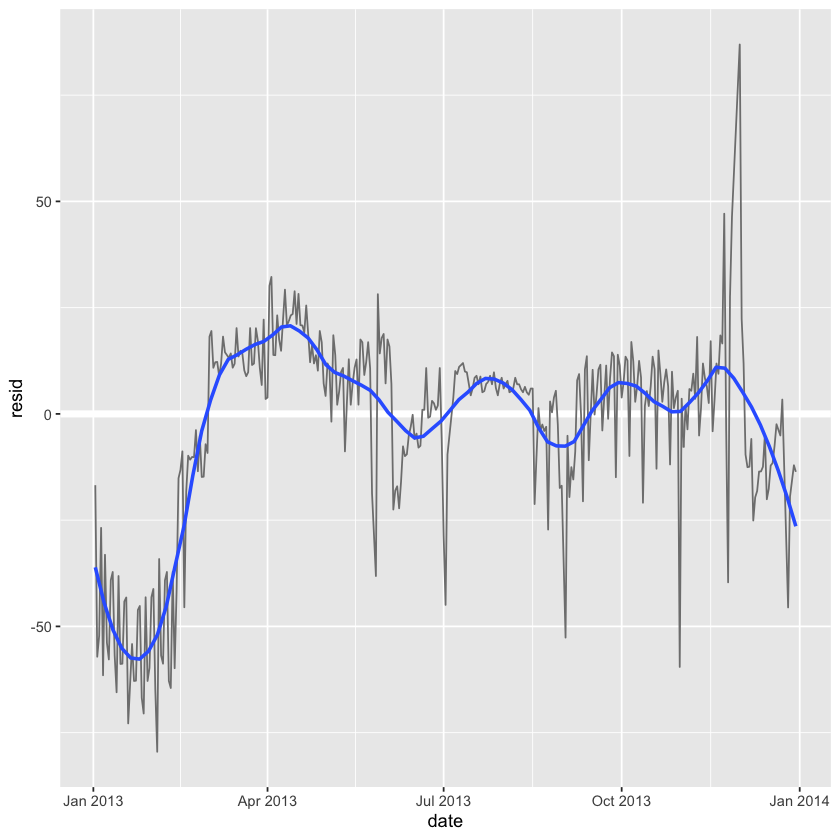

In [80]:
daily %>%
  add_residuals(mod3, "resid") %>% filter(abs(resid) < 100) %>%
  ggplot(aes(date, resid)) + geom_ref_line(h = 0) +
  geom_line(color = "grey50") + geom_smooth(se = FALSE, span = 0.20)

Can't do much with this as we only have one year of data.

In [1]:
library(IRdisplay)

  display_html("<iframe width='560' height='315' src='https://www.youtube.com/embed/LPptRkGoYMg?rel=0&amp;controls=0&amp;showinfo=0'</iframe>")

### [John Hopkins University R Exploratory Data Analysis Course](https://www.coursera.org/learn/exploratory-data-analysis?specialization=jhu-data-science)